# <center>Modélisation Algorithmique<br /> Workshop</center>

![logoEI_1_6.jpg](attachment:logoEI_1_6.jpg)

# 1. Représentation d'un graphe via une liste d'adjacence

L'objectif est de fournir à l'équipe technique un "itinéraire" permettant de passer par toutes les rues de la zone, une et une seule fois, en partant de l'intersection de la *rue Smatti* et de la *rue du Général Cohen Boulakia* (noté "Départ" sur le schéma) et en y revenant. Il faut aussi déterminer s'il sera faisable de déterminer un itinéraire du même genre pour une carte plus grande, et à quel prix.

Mais avant de travailler sur cette carte, reprenons le problème des **7 ponts de Königsberg**. Ce problème consiste à déterminer s'il existe ou non une promenade dans les rues de Königsberg permettant, à partir d'un point de départ au choix, de passer une et une seule fois par chaque pont, et de revenir à son point de départ. 
On peut traduire ce schéma en un graphe où _les zones de la ville sont des sommets_ et où _les ponts à franchir sont les arêtes_ du graphe. 
![7ponts.png](attachment:7ponts.png)

Dans ce graphe (qui est en fait un [multigraphe](https://fr.qaz.wiki/wiki/Multigraph)), passer par tous les ponts une seule fois revient à passer par chaque arête une seule fois. Peut-on appliquer cette méthode à la carte qu'Agathe nous a fournie ?

In [0]:
# Il est impossible d'utiliser une chaine eulérienne dans le cas de problèmes de ponts de koenigsberg car le graph qui en découl est dit non-eulérien.

C'est bien tout ça mais on ne peut pas donner ces graphes en entrée du programme sous cette forme sagittale ! Nous allons avoir besoin d'implémenter une structure de données. On va représenter en mémoire notre graphe par une [liste d'adjacence](https://fr.wikipedia.org/wiki/Liste_d%27adjacence) en utilisant les [listes](https://docs.python.org/3/tutorial/introduction.html#lists) en Python.

## 1.1 Implémentation de la liste d'adjacence de la Zone A
Revoyons le principe de la liste d'adjacence sur un exemple:

![Adj.jpg](attachment:Adj.jpg)

On a deux listes :
* `Head` qui contient les têtes de liste
* `Succ` qui contient les listes de successeurs pour chaque tête de liste.

Mais attention, dans cet exemple, le graphe est orienté. Nous, nous considérons un graphe non orienté. Comment faire ?
<em>À COMPLÉTER</em>

Appliquons cette représentation à la zone A du schéma d'Agathe :

In [0]:
HeadZoneA =  [1,2,3,4,5,6,7,8,9,10,11,12,13]
SuccZoneA =  [[2,5],[1,11],[4,6],[3,10],[1,6],[3,5,7,8],[6,9],[6,9],[7,8,10,12],[4,9,11,13],[2,10],[9,13],[10,12]]

In [0]:
def degreSommetsGraphe(Head, Succ):
    sommet = 1                        
    for sommet in range( len(Head)):
        indiceCourant = Head[sommet-1]
        indiceSuivant = Head[sommet]
        # calcul du degré et création du message à afficher
        #A COMPLETER
        message = "Le sommet " + str(Head[sommet]) + " est de degré " + str(len(Succ[sommet])) + " (voisins : "

        # ajout de la liste des voisins dans le message (en une seule instruction !)
        message +=  str(Succ[sommet])
        
        print(message)        
    return;

print("### Degré des sommets du graphe de la Zone A ###")
degreSommetsGraphe(HeadZoneA, SuccZoneA)

## 1.2 Implémentation de la liste d'adjacence des 7 ponts de Könisgberg
Même chose maintenant avec la liste d'adjacence permettant de représenter le problème des 7 ponts de Könisgberg. Initialisez cette liste d'adjacence de manière à ce que `Head7Ponts` représente la liste des têtes de listes et `Succ7Ponts` représente la liste des listes des successeurs.

Les sommets seront numérotés comme suit :
1. _Nord_ sera le sommet `1`
2. _Centre_ sera le sommet `2`
3. _Est_ sera le sommet `3`
4. _Sud_ sera le sommet `4`


**Attention: Si 2 arêtes différentes connectent 2 sommets, ces sommets apparaiteront 2 fois dans la liste des successeurs.**

In [0]:
Head7Ponts = ["NORD","CENTRE","EST","SUD"]
Succ7Ponts =  [[2,2,3],[1,1,3,4,4],[1,2,4],[2,2,3]]

print("### Degré des sommets du graphe des 7 ponts de Könisgberg ###")
degreSommetsGraphe(Head7Ponts, Succ7Ponts)

Cette représentation par liste d'adjacence semble très efficace pour déterminer tous les voisins d'un sommet. Mais est-elle aussi efficace pour tous les traitements qu'on pourrait imaginer sur un graphe ? Et si le graphe est orienté ?
<em>À COMPLÉTER</em>

In [0]:
# Je trouve qu'il est plus simple et plus complet de représenter un graphe sous la forme de sa matrice d'ajacence comme certaine opération peuvent se baser sur l'absence de liason pour fonctionner il est plus imple qu'elle soit explitcite que de la déterminer

# 2. Représentation d'un graphe via une matrice d'adjacence

Puisque cette représentation par liste d'adjacence a des limites, essayons d'utiliser une autre structure : une [matrice d'adjacence](https://fr.wikipedia.org/wiki/Matrice_d%27adjacence) ! Si on reprend l'exemple de tout à l'heure, ça donne cette représentation :

![matr.png](attachment:matr.png)

Dans cette représentation, on utilise une matrice carrée $m$ de taille $n\times n$ (avec $n$ le nombre de sommets) dans laquelle une arête $a~— b$ est représentée par la valeur $1$ dans l'élement $m_{ab}$. Pour les sommets non reliés entre eux, on met la valeur $0$.

Que pensez-vous de cette représentation ? Est-elle meilleure que la liste d'adjacence ?

In [0]:
# Plus complète d'un point de vue explicite mais pas plus facile à lire. Des avantages existe dans les deux cas pour la performance en calcul et en mémoire

Il y a un autre point très important pour le calcul scientifique, la place en mémoire. Lorsqu'on considère des sommets qui se comptent en millions voire en milliards (ce qui est le cas du _social graph_ de Facebook, par exemple), c'est primordial. De ce point de vue, quelle est la structure la plus efficace ? 

In [0]:
# La liste d'adjacence car sa compléxié spatiale est de N alors que celle de la matrice est de N^2

## 2.1 Implémentation de la matrice d'adjacence de la Zone A
On va commencer par initialiser la matrice d'adjacence permettant de représenter la zone A du schéma d'Agathe : `matrixZoneA` représente cette matrice. Ici, nous ne considérons pas les distances, c'est-à-dire les longueurs de chaque rue. Pourquoi ? Qu'est-ce que ça implique au niveau de la matrice ? Quelle structure devrait-on utiliser si on voulait prendre en compte ces longueurs ?

In [0]:
# Tout les liens sont représenté par un 1, Une matrice pondérée.

Par ailleurs, on considère un graphe non orienté. En conséquence, quelle propriété structurelle a cette matrice ?

In [0]:
# Elle devrait être symétrique

In [0]:
matrixZoneA = [
    [0,1,0,0,1,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,1,0,0,0],
    [1,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,1,0,1,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,1,1,0,1,0,1,0],
    [0,0,0,1,0,0,0,0,1,0,1,0,1],
    [0,1,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,1,0,1,0]
]

Afin de vérifier que les données entrées dans cette matrice sont correctes, completez la méthode `degreSommetsGrapheMatrice(matrice)` qui prend un graphe en paramètre (sous la forme d'une matrice) et qui affiche pour chaque sommet :
<ul>
    <li>Son degré.</li>
    <li>La liste de ses voisins.</li>
</ul>

Là aussi, l'usage des Comprehension lists sera certainement plus pratique que si on implémentait une double boucle imbriquée.

In [0]:
def get_index_positions(list_of_elems, element):
    index_pos_list = []
    index_pos = 0
    while True:
        try:
            # Search for item in list from indexPos to the end of list
            index_pos = list_of_elems.index(element, index_pos)
            # Add the index position in list
            index_pos_list.append(index_pos)
            index_pos += 1
        except ValueError as e:
            break
    return index_pos_list

In [0]:
def degreSommetsGrapheMatrice(matrice):
    for sommet in range(1, len(matrice)+1):
        liste = matrice[sommet-1]
        #A COMPLETER
        message = "Le sommet " + str(sommet) + " est de degré " + str(matrice[sommet-1].count(1)) + " (voisins : "
        message += str([x + 1 for x in get_index_positions(matrice[sommet - 1],1) ]) + " )"
        
        print(message)

print("### Degré des sommets du graphe de la Zone A ###")
degreSommetsGrapheMatrice(matrixZoneA)

## 2.2 Implémentation de la matrice d'adjacence des 7 ponts de Könisgberg
Même chose maintenant avec la matrice d'adjacence permettant de représenter le problème des 7 ponts de Könisgberg. Initialisez cette matrice : `matrix7Ponts` représente cette matrice. 

Pour rappel, les sommets seront numérotés comme suit :
<ul>
    <li>Nord sera le sommet 1.</li>
    <li>Centre sera le sommet 2.</li>
    <li>Est sera le sommet 3.</li>
    <li>Sud sera le sommet 4.</li>
</ul>

In [0]:
matrix7Ponts = [
    [0,1,1,0],
    [1,0,1,1],
    [1,1,0,1],
    [0,1,1,0],
]

print("### Degré des sommets du graphe des 7 ponts de Könisgberg ###")
degreSommetsGrapheMatrice(matrix7Ponts)

# 3. Cycle Eulérien

## 3.1 Existence d'un cycle Eulérien dans un graphe

Grâce que théorème d'Euler, nous savons qu'**il existe un cycle Eulérien dans un graphe si et seulement si le graphe est connexe et qu’il n’y a aucun sommet de degré impair dans le graphe**. Ici nous considérons que tous nos graphes sont connexes. 

Completez la fonction `existeCycleEulerien(matrice)` qui prend un graphe en paramètre (sous la forme d'une matrice d'adjacence) et qui retourne `True` si il existe un cycle Eulérien dans le graphe :

Vous pourriez bien avoir besoin du [modulo](http://reeborg.ca/docs/fr/oop/modulo.html) ! Par ailleurs, en Python, un booléen a la valeur 1. Comment peut-on exploiter ça ?

In [0]:
# En utilisant un modulo pour déterminer si le dégré des sommets est pair

Allons-y !

In [0]:
def existeCycleEulerien(matrice):                                     

    for sommet in matrice:
        if sommet.count(1) % 2:
            return False
    return True

print("### Existe-t-il un cycle Eulérien dans le graphe de la Zone A ? ###")
existeCycleEulerien(matrixZoneA)

Testons aussi la fonction sur le graphe des 7 ponts de Könisgberg !

In [0]:
print("### Existe-t-il un cycle Eulérien dans le graphe des 7 ponts de Könisgberg ? ###")
existeCycleEulerien(matrix7Ponts)

Conclusion : il serait peut-être temps de prévenir le directeur de l'agence qu'il peut arrêter de chercher !

## 3.2 Calcul d'un cycle Eulérien dans un graphe

Maintenant qu'on est capable de déterminer si un graphe est Eulérien, il est temps de trouver un moyen de calculer un cycle Eulérien lorsqu'on a un tel graphe.

C'est justement ce que fait l'algorithme suivant, en utilisant le principe du [backtracking](https://www.geeksforgeeks.org/backtracking-algorithms/). Voici l'algorithme :

<strong>fonction</strong> CycleEulérien(graphe)
<div style="border-left: 1px solid black;padding-left:25px;margin:5px;">
    Créer un cycle et une pile de sommets vides<br>
    Initialiser le sommet courant comme étant le premier sommet de la matrice<br>
    <br>
    <strong>Répéter</strong> jusqu'à ce que la pile soit vide <strong>et</strong> que le noeud courant n'ait plus de voisins :
    <div style="border-left: 1px solid black;padding-left:25px;margin:5px;">
        <strong>Si</strong> le sommet courant a au moins un voisin :
        <div style="border-left: 1px solid black;padding-left:25px;margin:5px;">
            On ajoute le sommet courant à la pile<br>
            On supprime l'arête entre le sommet courant et ce voisin<br>
            Le sommet courant devient ce voisin
        </div>
        <strong>Sinon</strong> :
        <div style="border-left: 1px solid black;padding-left:25px;margin:5px;">
            on ajoute le sommet courant au cycle (principe du Backtracking)<br>
            on retire le 1er élément de la pile qui devient le sommet courant
        </div>
    </div>
</div>

D'ailleurs, pourquoi utiliser une pile ? Quelle méthode algorithmique aurait-on pu utiliser à la place ?
<em>À COMPLÉTER</em>

Complétez la méthode `cycleEulerien(matrice)` qui reprend le principe de cet algorithme. Elle prend un graphe possédant un cycle Eulérien en paramètre (sous la forme d'une matrice) et renvoie l'un des cycles Eulériens du graphe. N'oubliez pas que Python n'a pas de type spécifique pour les piles, mais que les listes offrent des opération d'empilage et de dépilage.

In [1]:
def cycleEulerien(matrice):
    n = len(matrice)

    cycle = list()     # cycle est notre cycle à construire
    stack = list()     # stack est une liste de sommets à traiter
    cur = 0            # cur est notre sommet courant : le 1er noeud traité est le premier noeud de la matrice

    # on boucle tant qu'il y a des sommets à traiter dans notre stack
    # ou que notre sommet courant possède au moins 1 voisin non traité
    while stack != [] or sum(matrice[cur]) != 0:
        if sum(matrice[cur]) == 0:
            # si le sommet courant ne possède aucun voisin
            # on l'ajoute à notre cycle et on revient au sommet ajouté précédemment dans la stack (backtracking)
            # qui devient notre nouveau sommet courant
            #A COMPLETER
            cycle.append(cur)
            cur = stack.pop()
            # si il a au moins 1 voisin
            # on l'ajoute à notre stack pour y revenir plus tard (backtracking)
            # on retire l'arête qu'il partage avec ce voisin
            # qui devient le sommet courant
        else:
            for i in range(n):
                if matrice[cur][i] > 0:
                    matrice[cur][i] = 0
                    matrice[i][cur] = 0
                    stack.append(cur)
                    cur = i
                    break
    return cycle

print("### Calcul d'un cycle Eulérien du graphe de la Zone A ###")

matrixZoneA = [
    [0,1,0,0,1,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,1,0,0,0],
    [1,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,1,0,1,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,1,1,0,1,0,1,0],
    [0,0,0,1,0,0,0,0,1,0,1,0,1],
    [0,1,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,1,0,1,0]
]

cycle = cycleEulerien(matrixZoneA)
for sommet in cycle:
   print(sommet + 1, "-> ", end = '')
print(cycle[0] + 1)

### Calcul d'un cycle Eulérien du graphe de la Zone A ###
1 -> 5 -> 6 -> 8 -> 9 -> 12 -> 13 -> 10 -> 9 -> 7 -> 6 -> 3 -> 4 -> 10 -> 11 -> 2 -> 1


Vérifiez qu'il s'agit bien d'un cycle eulérien.

# 5. Étude du temps de calcul

Notre algorithme a l'air de fonctionner. Et il est très rapide. D'ailleurs, de combien de temps a-t-il eu besoin pour se terminer ? Pour vérifier ça, on pourrait utiliser des [profileurs Python](https://docs.python.org/3/library/profile.html) comme `cProfile` ou `profile`. Ce genre d'outil est très puissant pour étudier les éléments de code les plus consommateurs en temps CPU ou en mémoire, leur usage est d'ailleurs fortement recommandé si vous avez besoin d'optimiser un code complexe. Mais ici, c'est peut-être un peu lourd...
La bibliothèque [`time`](https://docs.python.org/3/library/time.html) offre plein de fonctions qui pourraient être utiles. Laquelle vous semble adaptée ?
<em>À COMPLÉTER</em>
Testons ça tout de suite !

In [5]:
import time

start = time.time()
cycle = cycleEulerien(matrixZoneA)
stop = time.time()
print(stop-start)

0.0001728534698486328


Pour être rapide, c'est rapide ! Mais peut-être que sur notre instance, on a eu de la chance, et qu'un autre graphe de même taille serait plus lourd à gérer. Comment pourrait-on faire pour être un peu plus sûr du résultat ?
<em>À COMPLÉTER</em>

On pourrait faire tout ça à la main, mais il y a des bibliothèques qui nous faciliteront le travail. La bibliothèque [NumPy](https://numpy.org/doc/stable/) est un incontournable du calcul scientifique en Python. Parmi les fonctions d'[Échantillonnage aléatoire](https://numpy.org/doc/1.16/reference/routines.random.html) qu'elle propose, la fonction <a href='https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html'><code>np.random.choice()</code></a> permet entre autres de générer un ensemble de booléens, répartis dans la structure de notre choix (ici en matrice), qu'il ne nous restera plus qu'à transformer en entiers.

Attention tout de même, nous considérons un graphe non orienté, il faut donc construire une [matrice symétrique]('https://fr.wikipedia.org/wiki/Matrice_sym%C3%A9trique'). Il y a une technique simple : générer une matrice aléatoire carrée et lui superposer sa [transposée](https://fr.wikipedia.org/wiki/Matrice_transpos%C3%A9e) (c'est d'ailleurs pour ça qu'on passe par une matrice de booléens, ça nous permet d'utiiser le $ou$ logique).

Cette approche pose quand même quelques problèmes. Les voyez-vous ?

<em>À COMPLÉTER</em>

Vous trouverez dans la cellule suivante le code générant cette matrice. Inutile de le comprendre en détail (même s'il n'est pas bien compliqué), on se contentera de l'utiliser.

In [6]:
import numpy as np

def grapheAleatoireEulerien(taille):
    b = np.random.choice((True, False), size=(taille,taille), p=[0.4, 0.6])
    b_symm = np.logical_or(b, b.T)
    return b_symm.astype(int)

print(grapheAleatoireEulerien(4))

[[1 1 1 1]
 [1 0 1 0]
 [1 1 0 1]
 [1 0 1 0]]


Parfait ! Il ne nous reste plus qu'à tester tout ça en boucle sur notre algorithme. Une centaine d'itérations devrait suffire.

In [9]:
import time

start = time.time()
duree = 0
nb_iteration = 5000
for i in range(nb_iteration):
    cycleEulerien(grapheAleatoireEulerien(4))
stop = time.time()
duree = stop-start
print(duree/nb_iteration)

0.001441234254837036


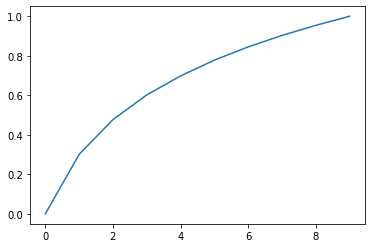

In [10]:
from matplotlib import pyplot as plt
plt.plot([0, 0.301, 0.477, 0.602, 0.698, 0.778, 0.845, 0.903, 0.954, 1])
plt.show()

Avec ça, on pourra afficher l'évolution du temps de calcul moyen en fonction de la taille des graphes.

Et puis on peut aussi déterminer le temps de calcul au pire. Ça nous donnera une vision un peu plus détaillée du fonctionnement de l'algorithme. C'est d'autant plus intéressant de les comparer que, si la complexité au pire reste relativement facile à étudier (c'est d'ailleurs l'un des objectifs du prosit), la [complexité en moyenne](https://fr.wikipedia.org/wiki/Complexit%C3%A9_en_moyenne_des_algorithmes) est nettement plus complexe à aborder, et nécessite des [outils mathématique avancés](https://fr.wikipedia.org/wiki/Combinatoire), notamment en [dénombrement](https://fr.wikipedia.org/wiki/D%C3%A9nombrement).

Et au passage, on va afficher une courbe un peu plus grande, et avec les légendes qui vont bien (attention, si votre ordinateur manque de puissance, réduisez le nombre d'itérations et la taille maximale ; vous pouvez aussi ne considerer que certaines tailles de graphe, grace au paramètre `step` de la fonction [`range`](https://www.w3schools.com/python/ref_func_range.asp)) 

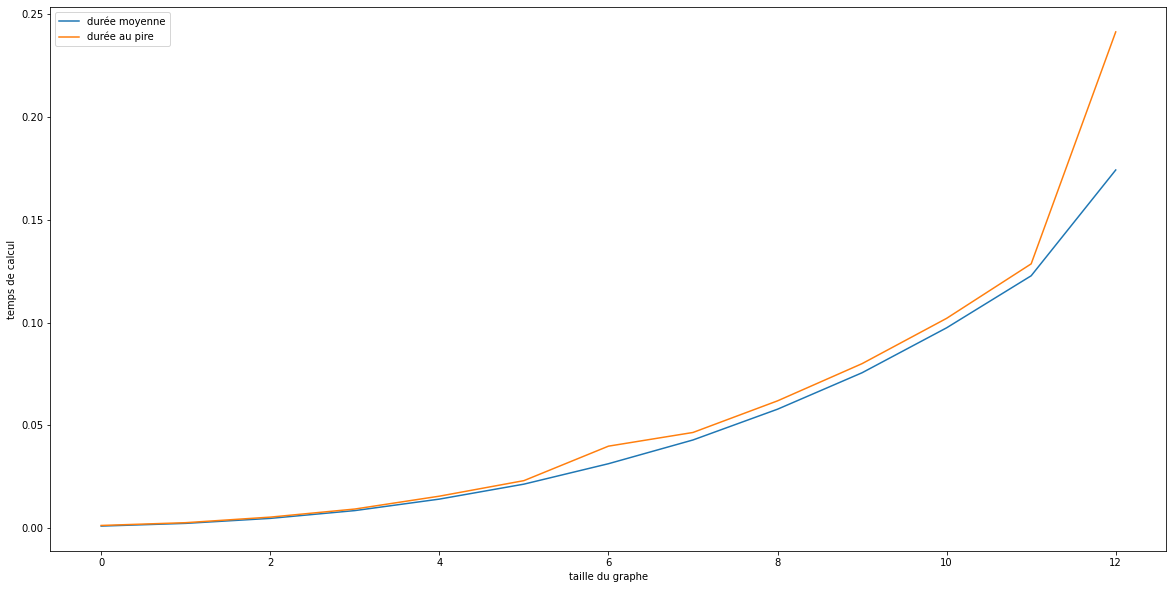

In [14]:
nb_iteration = 50
durees_moy = list()
durees_pire = list()

for taille in range(10, 75, 5):
    duree_pire = 0
    start1 = time.time()
    for i in range(nb_iteration):
        start2 = time.time()
        cycleEulerien(grapheAleatoireEulerien(taille))
        stop2 = time.time()
        duree2 = stop2-start2
        if duree_pire < duree2:
            duree_pire = duree2
    stop1 = time.time()
    duree1 = stop1-start1
    duree_moy = duree1/nb_iteration
    durees_moy.append(duree_moy)
    durees_pire.append(duree_pire)
 
plt.figure(figsize=(20,10))
plt.xlabel('taille du graphe')
plt.ylabel('temps de calcul')
plt.plot(durees_moy, label='durée moyenne')
plt.plot(durees_pire, label='durée au pire')
plt.legend()
plt.show()

Qu'observez-vous ? À quoi ressemblent ces courbes ?

Comment peut-on interpréter ces résultats ?

Pensez-vous qu'on puisse faire mieux en terme de rapidité d'exécution ?

Et que pensez-vous qu'on puisse faire pour affiner notre étude expérimentale ?

In [ ]:
Essayer de ploter plusieurs méthodes de calcul sur le graphiques des temps d'execution'

# 6. Conclusion

On en a fini avec ce cycle eulérien ! Si vous voulez implémenter l'algorithme du postier chinois, vous devriez vous en sortir sans problème. D'ailleurs, si vous implémentez un algorithme qui détermine lequel, de l'algorithme du cycle hamiltonien ou de celui du postier chinois, doit être utilisé, étudier son comportement expérimental pourra être intéressant…